#### DSC630
###### Xin Tang
###### Week 8 time series Modeling

using the dataset us_retail_sales.csv to do a time seriea preduction, this data gives the total monthly retail sales in the US from January 1992 until June 2021. 

In [ ]:
import numpy as np
import pandas as pd

# Loading the data
df = pd.read_csv("us_retail_sales.csv")

df.head()

In [26]:
# Reshape the date so months are in row.
df2 = pd.melt(df, id_vars=['YEAR'], value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], 
        var_name='Month', value_name='Sales')
df2.head()

,YEAR,Month,Sales
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [27]:
# Convert month to ordered numbers.
df2['Month'] = df2['Month'].map({'JAN' :1,'FEB' :2,'MAR' :3, 'APR' :4,'MAY' :5,'JUN' :6,'JUL' :7,'AUG' :8,'SEP' :9,'OCT' :10,'NOV' :11,'DEC' :12})
df2.head(13)

,YEAR,Month,Sales
0,1992,1,146925.0
1,1993,1,157555.0
2,1994,1,167518.0
3,1995,1,182413.0
4,1996,1,189135.0
5,1997,1,202371.0
6,1998,1,209666.0
7,1999,1,223997.0
8,2000,1,243436.0
9,2001,1,252654.0


In [29]:
# Sort the year and month in orders.
sorted = df2.sort_values(by = ['YEAR','Month'], ascending = [True, True], na_position = 'first')
sorted.head()

,YEAR,Month,Sales
0,1992,1,146925.0
30,1992,2,147223.0
60,1992,3,146805.0
90,1992,4,148032.0
120,1992,5,149010.0


In [9]:
# Check the data type
sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YEAR    48 non-null     int64
 1   Month   48 non-null     int64
 2   Sales   48 non-null     int64
dtypes: int64(3)
memory usage: 1.5 KB


In [30]:
# Merge the year and month as a date 
sorted['Date']= sorted['YEAR'].astype(str) +'-'+ sorted['Month'].astype(str)

In [71]:
#sorted["Month"] = pd.to_datetime(sorted.Month, errors='coerce').dt.month
#sorted["YEAR"] = pd.to_datetime(sorted.YEAR, errors='coerce').dt.year
#sorted['YEAR'] = pd.to_datetime(sorted['YEAR'], format='%Y')
#sorted['Month'] = pd.to_datetime(sorted['Month'], format='%m')

In [21]:
#sorted.head(2)

,YEAR,Month,Sales,date
0,1992,1,146925,1992-1
4,1992,2,147223,1992-2


In [32]:
# Convert Date into datetime format
sorted['Date']= pd.to_datetime(sorted['Date'])

In [33]:
sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    360 non-null    int64         
 1   Month   360 non-null    int64         
 2   Sales   354 non-null    float64       
 3   Date    360 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 14.1 KB


In [42]:
# Create a new dataframe with Date and Sales only.
clean =sorted[['Sales','Date']]
clean.head(4)
clean.shape

(360, 2)

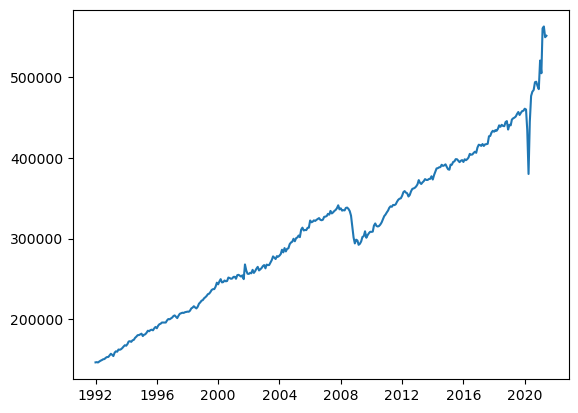

There are 2 abnormal sales varaitions, at end of 2008 and Apr-2020, plus, the sales growth rate at 2021 are also unprecedented. 


In [114]:
# Check the overall trend of sales to spot anything abnormal

import matplotlib.pyplot as plt

plt.plot(clean['Date'], clean['Sales'])  # Plot the chart
plt.show()
print('There are 2 abnormal sales varaitions, at end of 2008 and Apr-2020, plus, the sales growth rate at 2021 are also unprecedented. ') 


In [74]:
# Since I only has one column to process, direct split the data into train and test set
x = clean.Sales
train = x[:342]
test = x[342:354]
print(train.size, test.size)

342 12


In [62]:
#Using AR model

#Suspend the warning
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

res = AutoReg(train, lags = 10).fit()

In [89]:
# Predict the sales from July-2020 to June-2021
predictions = res.predict(start=343, end=354)

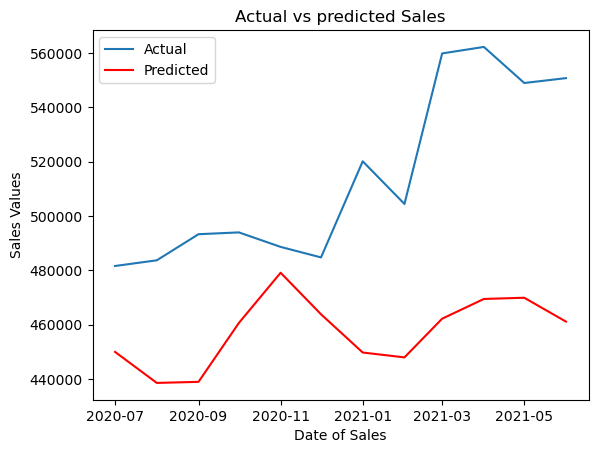

In [115]:
# Visualize the prediction vs the actual sales. 
truevalue= x[342:354]
plt.plot(clean.Date[342:354],truevalue, label = "Actual") 
plt.plot(clean.Date[342:354],predictions, label ='Predicted', color='red')
plt.legend()
plt.xlabel("Date of Sales")
plt.ylabel("Sales Values")
plt.title("Actual vs predicted Sales")
plt.show()


In [116]:
#Calculate R2, RMSE, and MAE on predictions

import sklearn.metrics as metrics
test_r2 = metrics.r2_score(truevalue, predictions)
test_mae = metrics.mean_absolute_error(truevalue, predictions)
test_mse = metrics.mean_squared_error(truevalue, predictions)
test_rmse = np.sqrt(test_mse)


print('prediction RSME value is:', test_rmse)


prediction RSME value is: 63378.83236300476


##### Conclusion:
the RSME is very big. so the model did not work very well. From Charts above, the model did predict the trend but the values were off quite a bit. I think the big abnormal sales dip in April-2020 and unprecedented sales growth in 2021 impact the development of model negatively.  

Resource: The dataset is provided by Bellevue university for use in DSC630 class.